In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import re

In [3]:
train_set = pd.read_csv('Income_classifier_train_set.csv')
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']


In [5]:
train_set.shape

(32561, 15)

In [6]:
train_set.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
train_set.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [8]:
train_set['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [9]:
# Making sure that the data doesn't contain unecessary spaces
train_set=train_set.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [10]:
# data doesn't have any unnecessary spaces
train_set['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

It looks like in this dataset missing values are denoted by '?', so we will replace them with NaN.

In [11]:
# we are replacing ? with NaN for them to be imputed down the line.
train_set.replace('?',np.NaN,inplace=True)

In [12]:
train_set.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
wage_class           0
dtype: int64

In [13]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    31978 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [14]:
#Percentage of missing values in the dataset
train_set.isna().mean()

age               0.000000
workclass         0.056386
fnlwgt            0.000000
education         0.000000
education_num     0.000000
marital_status    0.000000
occupation        0.056601
relationship      0.000000
race              0.000000
sex               0.000000
capital_gain      0.000000
capital_loss      0.000000
hours_per_week    0.000000
native_country    0.017905
wage_class        0.000000
dtype: float64

In [15]:
# checking for the columns containing missing values
cols=train_set.columns
mv=[]
a=train_set.isna().sum()
#print(type(a))
for i in range(len(a)):
    if a[i]>0:
        mv.append(cols[i])
        

In [16]:
mv

['workclass', 'occupation', 'native_country']

As we can see all the columns that containing missing values are of object type and their percentage is quite less so we are replacing the missing values/null values with the most frequent value of that column.

In [17]:
#substitutes null values with the most frequent value in that column.
for i in mv:
    x = train_set[i].mode()[0]
    train_set[i].fillna(x,inplace=True)

In [18]:
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

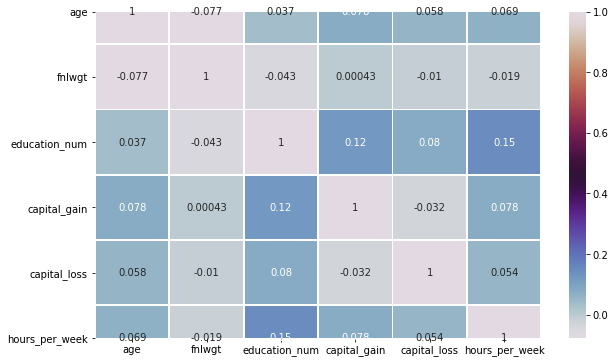

In [19]:
#Next we should find for any correlation among the columns

corr = train_set.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,linewidths=0.8,cmap='twilight')

the columns containing string values are below:
    **workclass,
    education,
    marital_status,
    occupation,
    relationship,
    race,
    sex,
    native_country,
    wage_class**

In [20]:
df_copy = train_set.copy()

In [21]:
train_set['workclass'].value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

let's try to group the govt employees. private, govt_emp, self_emp, Non_working.

In [22]:
def modify_workclass(x):
    if x == 'Private':
        return x
    elif (x == 'Self-emp-not-inc' or x == 'Self-emp-inc'):
        return 'Self_emp'
    elif (x == 'Local-gov' or x == 'State-gov' or x == 'Federal-gov'):
        return 'Govt_emp'
    else:
        return 'Others'

In [23]:
#Applying the above function on the native_country column
train_set['workclass'] = train_set['workclass'].map(modify_workclass)

In [24]:
train_set['workclass'].value_counts()

Private     24532
Govt_emp     4351
Self_emp     3657
Others         21
Name: workclass, dtype: int64

In [25]:
train_set['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [26]:
train_set['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [27]:
train_set['education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [28]:
train_set[['education','education_num']].head(12)

,education,education_num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
5,Masters,14
6,9th,5
7,HS-grad,9
8,Masters,14
9,Bachelors,13


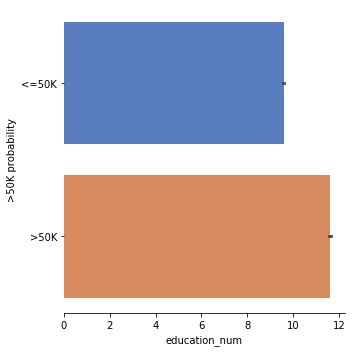

In [29]:
g = sns.catplot(x="education_num",y="wage_class",data=train_set,kind="bar",palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

In [30]:
train_set[train_set['education']=='7th-8th'].describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,646,646,646,646,646,646,646,646,646
unique,4,1,6,13,6,5,2,27,2
top,Private,7th-8th,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,496,646,359,116,333,553,486,518,606


In [31]:
train_set[train_set['education_num']>12].describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,8067,8067,8067,8067,8067,8067,8067,8067,8067
unique,3,4,7,14,6,5,2,40,2
top,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,5137,5355,4469,3366,3969,7102,5734,7357,4158


In [32]:
train_set[train_set['education_num']<=6].describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,2645,2645,2645,2645,2645,2645,2645,2645,2645
unique,4,6,6,13,6,5,2,34,2
top,Private,10th,Married-civ-spouse,Other-service,Husband,White,Male,United-States,<=50K
freq,2219,933,1211,512,1081,2169,1900,1962,2494


In [33]:
def modify_education(x):
    if x<= 6:
        return "Low"
    elif (x>6 and x<=12):
        return "Medium"
    else:
        return "High"

In [34]:
#Applying the above function to group eduction into low/Medium/High
train_set['education'] = train_set['education_num'].map(modify_education)

In [35]:
train_set.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,Govt_emp,77516,High,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self_emp,83311,High,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,Medium,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


Since the education column is transformed into 3 specific values now we don't need the **'education_num'** column. Hence dropping the **'education_num'** column.

In [36]:
train_set.drop('education_num',axis=1,inplace=True)

In [37]:
train_set.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,Govt_emp,77516,High,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self_emp,83311,High,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,Medium,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,Medium,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,High,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [38]:
train_set.shape

(32561, 14)

In [39]:
train_set['native_country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [40]:
train_set['native_country'].value_counts()

United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [41]:
def modify_native_country(x):
    if (x=='United-States' or x=='Mexico' or x == 'Philippines' or x == 'Germany' or x=='Canada'):
        return x
    else:
        return 'Others'

In [42]:
#Applying the above function on the native_country column
train_set['native_country'] = train_set['native_country'].map(modify_native_country)

In [43]:
train_set['native_country'].value_counts()

United-States    29753
Others            1709
Mexico             643
Philippines        198
Germany            137
Canada             121
Name: native_country, dtype: int64

In [44]:
train_set[train_set['native_country'] == 'United-States'].wage_class.value_counts()

<=50K    22436
>50K      7317
Name: wage_class, dtype: int64

In [45]:
train_set['marital_status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [46]:
train_set['marital_status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

In [47]:
def modify_marital_status(x):
    if (x == 'Married-civ-spouse' or x == 'Married-AF-spouse'):
        return 'Married'
    elif (x == 'Never-married' or x == 'Married-spouse-absent'):
        return 'Single'
    #elif (x == 'Divorced' or x == 'Separated' or x == 'Widowed'):
        #return x
    else:
        return x

In [48]:
#Applying the above function on the marital_status column
train_set['marital_status'] = train_set['marital_status'].map(modify_marital_status)

In [49]:
train_set['marital_status'].value_counts()

Married      14999
Single       11101
Divorced      4443
Separated     1025
Widowed        993
Name: marital_status, dtype: int64

In [50]:
train_set['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [51]:
len(train_set['occupation'].unique())

14

In [52]:
train_set['occupation'].value_counts()

Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [53]:
train_set[train_set['occupation']=='Exec-managerial'].describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,4066,4066,4066,4066,4066,4066,4066,4066,4066
unique,3,3,5,1,6,5,2,6,2
top,Private,Medium,Married,Exec-managerial,Husband,White,Male,United-States,<=50K
freq,2691,2028,2445,4066,2187,3646,2907,3809,2098


In [54]:
train_set[train_set['occupation']=='Prof-specialty'].describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,5983,5983,5983,5983,5983,5983,5983,5983,5983
unique,4,3,5,1,6,5,2,6,2
top,Private,High,Married,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,4149,3366,2768,5983,2293,5166,3627,5488,3933


In [55]:
#Craft-repair
train_set[train_set['occupation']=='Craft-repair'].describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,4099,4099,4099,4099,4099,4099,4099,4099,4099
unique,4,3,5,1,6,5,2,6,2
top,Private,Medium,Married,Craft-repair,Husband,White,Male,United-States,<=50K
freq,3195,3390,2567,4099,2511,3694,3877,3754,3170


In [56]:
train_set[train_set['occupation']=='Sales'].describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,3650,3650,3650,3650,3650,3650,3650,3650,3650
unique,3,3,5,1,6,5,2,6,2
top,Private,Medium,Married,Sales,Husband,White,Male,United-States,<=50K
freq,2942,2519,1665,3650,1506,3237,2387,3430,2667


In [57]:
len(train_set['occupation'])

32561

In [58]:
# let's obtain the counts for each one of the labels in variable X2
# let's capture this in a dictionary that we can use to re-map the labels

df_occupation_map=train_set['occupation'].value_counts().to_dict()

In [59]:
train_set['occupation']=train_set['occupation'].map(df_occupation_map)

In [60]:
train_set['occupation'].head()

0    3770
1    4066
2    1370
3    1370
4    5983
Name: occupation, dtype: int64

In [66]:
#def modify_occupation(x):
 #   if re.search('managerial', x):
  #      return "Managerial"
   # elif re.search("specialty", x):
   #     return "Specialist"
 #   else:
  #      return "Others"

In [67]:
#train_set['occupation'] = train_set['occupation'].map(modify_occupation)

In [61]:
train_set.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,Govt_emp,77516,High,Single,3770,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self_emp,83311,High,Married,4066,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,Medium,Divorced,1370,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,Medium,Married,1370,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,High,Married,5983,Wife,Black,Female,0,0,40,Others,<=50K


In [74]:
train_set['occupation'].value_counts()

Others        22512
Specialist     5983
Managerial     4066
Name: occupation, dtype: int64

In [44]:
train_set['relationship'].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [45]:
train_set['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [62]:
train_set['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [63]:
train_set['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [64]:
def modify_race(skin_colour):
    if (skin_colour == 'White' or skin_colour == 'Black'):
        return skin_colour
    else:
        return 'Other'

In [65]:
#Applying the above function on the race column
train_set['race'] = train_set['race'].map(modify_race)

In [66]:
train_set['race'].value_counts() #checking the new values

White    27816
Black     3124
Other     1621
Name: race, dtype: int64

In [67]:
train_set['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [68]:
train_set['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [69]:
train_set['sex'] = train_set['sex'].map({'Male': 0,'Female' : 1})

In [70]:
df = train_set.copy()
df.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,Govt_emp,77516,High,Single,3770,Not-in-family,White,0,2174,0,40,United-States,<=50K
1,50,Self_emp,83311,High,Married,4066,Husband,White,0,0,0,13,United-States,<=50K
2,38,Private,215646,Medium,Divorced,1370,Not-in-family,White,0,0,0,40,United-States,<=50K
3,53,Private,234721,Medium,Married,1370,Husband,Black,0,0,0,40,United-States,<=50K
4,28,Private,338409,High,Married,5983,Wife,Black,1,0,0,40,Others,<=50K


In [71]:
df['wage_class'] = df['wage_class'].apply(lambda x: 1 if x == '>50K' else 0)

In [72]:
df['wage_class'].head()

0    0
1    0
2    0
3    0
4    0
Name: wage_class, dtype: int64

In [73]:
df['hours_per_week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

In [74]:
# dropping this column since it doesn't have any direct relation with the label column
df.drop(['fnlwgt','relationship'],axis = 1, inplace=True)

In [75]:
df.shape

(32561, 12)

In [76]:
df.head()

,age,workclass,education,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,Govt_emp,High,Single,3770,White,0,2174,0,40,United-States,0
1,50,Self_emp,High,Married,4066,White,0,0,0,13,United-States,0
2,38,Private,Medium,Divorced,1370,White,0,0,0,40,United-States,0
3,53,Private,Medium,Married,1370,Black,0,0,0,40,United-States,0
4,28,Private,High,Married,5983,Black,1,0,0,40,Others,0


In [77]:
# copying all the numerical columns from the dataset into one single Dataframe which will be used for scaling

numerical_columns = df.select_dtypes(include='int64')

In [78]:
numerical_columns

,age,occupation,sex,capital_gain,capital_loss,hours_per_week,wage_class
0,39,3770,0,2174,0,40,0
1,50,4066,0,0,0,13,0
2,38,1370,0,0,0,40,0
3,53,1370,0,0,0,40,0
4,28,5983,1,0,0,40,0
...,...,...,...,...,...,...,...
32556,27,928,1,0,0,38,0
32557,40,2002,0,0,0,40,1
32558,58,3770,1,0,0,40,0
32559,22,3770,0,0,0,20,0


In [79]:
# copying all the categorical columns from the dataset into one single dataset which we will use for encoding
cat_df = df.select_dtypes(include='object').copy()

In [80]:
cat_df.head()

,workclass,education,marital_status,race,native_country
0,Govt_emp,High,Single,White,United-States
1,Self_emp,High,Married,White,United-States
2,Private,Medium,Divorced,White,United-States
3,Private,Medium,Married,Black,United-States
4,Private,High,Married,Black,Others


In [81]:
cat_df.describe(include='object')

,workclass,education,marital_status,race,native_country
count,32561,32561,32561,32561,32561
unique,4,3,5,3,6
top,Private,Medium,Married,White,United-States
freq,24532,21849,14999,27816,29753


In [82]:
# changing the separator since it might cause problem when creating the flask app
cat_df.replace('-','_',regex=True,inplace=True)

In [83]:
cat_df.head()

,workclass,education,marital_status,race,native_country
0,Govt_emp,High,Single,White,United_States
1,Self_emp,High,Married,White,United_States
2,Private,Medium,Divorced,White,United_States
3,Private,Medium,Married,Black,United_States
4,Private,High,Married,Black,Others


In [84]:
#we will use the cat_df since it has all the categorical columns
for col in cat_df.columns:
    #x=cat_df[col].head(1)
    cat_df= pd.get_dummies(cat_df, columns=[col], prefix = [col], drop_first=True)

In [93]:
cat_df.head()

,workclass_Others,workclass_Private,workclass_Self_emp,education_Low,education_Medium,marital_status_Married,marital_status_Separated,marital_status_Single,marital_status_Widowed,occupation_Others,occupation_Specialist,race_Other,race_White,native_country_Germany,native_country_Mexico,native_country_Others,native_country_Philippines,native_country_United_States
0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
3,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1
4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [85]:
cat_df.shape

(32561, 16)

In [86]:
numerical_columns.columns[:-1]

Index(['age', 'occupation', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [69]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
# scaling the numerical columns
#scaled_data=scaler.fit_transform(numerical_columns.drop('wage_class',axis=1))

In [70]:
#scaled_data_df = pd.DataFrame(data=scaled_data,columns=numerical_columns.columns[:-1])

In [71]:
#scaled_data_df.head()

,age,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.134739,-0.145920,-0.21666,-0.035429


In [87]:
#X = pd.concat([scaled_data_df,cat_df],axis=1)
X = pd.concat([numerical_columns.drop('wage_class',axis=1),cat_df],axis=1)

In [88]:
X.shape

(32561, 22)

In [89]:
X.head()

,age,occupation,sex,capital_gain,capital_loss,hours_per_week,workclass_Others,workclass_Private,workclass_Self_emp,education_Low,...,marital_status_Separated,marital_status_Single,marital_status_Widowed,race_Other,race_White,native_country_Germany,native_country_Mexico,native_country_Others,native_country_Philippines,native_country_United_States
0,39,3770,0,2174,0,40,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,50,4066,0,0,0,13,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,38,1370,0,0,0,40,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,53,1370,0,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,28,5983,1,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [122]:
X.describe()

,age,occupation,sex,capital_gain,capital_loss,hours_per_week,workclass_Others,workclass_Private,workclass_Self_emp,education_Low,...,marital_status_Separated,marital_status_Single,marital_status_Widowed,race_Other,race_White,native_country_Germany,native_country_Mexico,native_country_Others,native_country_Philippines,native_country_United_States
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,...,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3631.672461,0.330795,1077.648844,87.303830,40.437456,0.000645,0.753417,0.112312,0.081232,...,0.031479,0.340929,0.030497,0.049783,0.854274,0.004207,0.019748,0.052486,0.006081,0.913762
std,13.640433,1522.979583,0.470506,7385.292085,402.960219,12.347429,0.025388,0.431029,0.315755,0.273195,...,0.174612,0.474029,0.171952,0.217501,0.352837,0.064730,0.139134,0.223009,0.077744,0.280720
min,17.000000,9.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,3295.000000,0.000000,0.000000,0.000000,40.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,3770.000000,0.000000,0.000000,0.000000,40.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,4099.000000,1.000000,0.000000,0.000000,45.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,5983.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
#Variables to be used for API creation
X.columns

Index(['age', 'occupation', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_Others', 'workclass_Private',
       'workclass_Self_emp', 'education_Low', 'education_Medium',
       'marital_status_Married', 'marital_status_Separated',
       'marital_status_Single', 'marital_status_Widowed', 'race_Other',
       'race_White', 'native_country_Germany', 'native_country_Mexico',
       'native_country_Others', 'native_country_Philippines',
       'native_country_United_States'],
      dtype='object')

In [91]:
y = numerical_columns['wage_class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: wage_class, dtype: int64

In [92]:
y.shape

(32561,)

In [93]:
y.unique()

array([0, 1], dtype=int64)

In [94]:
y.value_counts()

0    24720
1     7841
Name: wage_class, dtype: int64

(array([24720.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7841.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

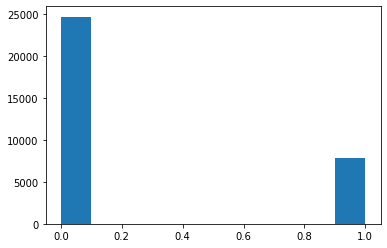

In [95]:
# plotting the target column to check whether it's an imbalanced dataset or not (necessary step for classification problem)
plt.hist(y)

**Primary model building**

In [96]:
#Now doing the necessary imports for xgboost algorithm.
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split #split the data into train and test set

In [97]:
#testing for Random-forest
#We would split our data in train and test set
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 333)

In [98]:
x_train.shape

(22792, 22)

In [99]:
y_train.value_counts()

0    17251
1     5541
Name: wage_class, dtype: int64

###### Using class_weights on random_forest model for initial prediction with imbalanced dataset.

**Important tip:** One of the techniques for handling imbalanced dataset is appying Random-forest algorithm with the class_weights parameter, what it does is increasing the importance of one class compare to the other while builing the model based on the training dataset.

In [100]:
class_weights = dict({0:1,1:3})

In [101]:
clf_random_forest = RandomForestClassifier(class_weight=class_weights,random_state=200)
clf_random_forest.fit(x_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 3}, random_state=200)

In [102]:
# cheking initial testing accuracy(no hyperparameter tuning)
y_pred_rf = clf_random_forest.predict(x_test)
#predictions = [round(value) for value in y_pred]
accuracy_rf = accuracy_score(y_test,y_pred_rf)
accuracy_rf

0.8355000511823114

In [103]:
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

[[6682  787]
 [ 820 1480]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7469
           1       0.65      0.64      0.65      2300

    accuracy                           0.84      9769
   macro avg       0.77      0.77      0.77      9769
weighted avg       0.83      0.84      0.84      9769



**Applying Over-sampling technique**

In [104]:
# making the training dataset balanced with the help of random over sampler
rdsmple = RandomOverSampler(0.70)
#appyling the random-over sampler on the train dataset
x_sampled,y_sampled  = rdsmple.fit_sample(x_train,y_train)

C:\Users\Supratik\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


(array([17251.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 12075.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

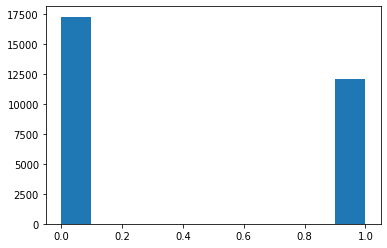

In [105]:
# again plotting the target column
plt.hist(y_sampled)

In [106]:
y_sampled.value_counts()

0    17251
1    12075
Name: wage_class, dtype: int64

#### XGBoost

In [107]:
# Applying over-sampling and creating XGBoost model
income_prediction_model1 = XGBClassifier(objective='binary:logistic')
income_prediction_model1.fit(x_sampled,y_sampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [108]:
# cheking initial testing accuracy(no hyperparameter tuning)
y_pred = income_prediction_model1.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy_test = accuracy_score(y_test,predictions)
print(accuracy_test)
print(confusion_matrix(y_test,y_pred)) #new one added
print(classification_report(y_test,y_pred)) #new-one added

0.8499334629951889
[[6433 1036]
 [ 430 1870]]
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      7469
           1       0.64      0.81      0.72      2300

    accuracy                           0.85      9769
   macro avg       0.79      0.84      0.81      9769
weighted avg       0.87      0.85      0.86      9769



above model is create today(18/12/2020)

In [121]:
import pickle
filename = 'income_classifier_xgb.pickle'

pickle.dump(income_prediction_model1,open(filename,'wb'))

In [118]:
#Previous when occupation was categorical variable
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[6322 1147]
 [ 427 1873]]
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      7469
           1       0.62      0.81      0.70      2300

    accuracy                           0.84      9769
   macro avg       0.78      0.83      0.80      9769
weighted avg       0.86      0.84      0.85      9769



In [116]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[6439 1030]
 [ 459 1841]]
              precision    recall  f1-score   support

           0       0.93      0.86      0.90      7469
           1       0.64      0.80      0.71      2300

    accuracy                           0.85      9769
   macro avg       0.79      0.83      0.80      9769
weighted avg       0.86      0.85      0.85      9769



In [109]:
# Now to increae the accuracy of the model, we'll do hyperparameter tuning using grid search
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [118]:
random_param={
    'learning_rate':[0.5,0.3,0.2,0.1,0.05],
    'max_depth': range(4,21,4),
    'n_estimators':[100,200,300,400],
    "gamma"      : [0.0, 0.1, 0.2 , 0.3]
    }
print(random_param)

{'learning_rate': [0.5, 0.3, 0.2, 0.1, 0.05], 'max_depth': range(4, 21, 4), 'n_estimators': [100, 200, 300, 400], 'gamma': [0.0, 0.1, 0.2, 0.3]}


In [119]:
random_search=RandomizedSearchCV(estimator=income_prediction_model1,param_distributions=random_param,n_iter=80,scoring='roc_auc',n_jobs=-1,cv=3,verbose=5)

In [120]:
random_search.fit(x_sampled,y_sampled)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 25.5min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=0,
                                           num_parallel_tree=1, random_state=0,
                                           reg_alpha=0, reg_lambda=1,
                                       

In [121]:
random_search.best_params_

{'n_estimators': 200, 'max_depth': 20, 'learning_rate': 0.2, 'gamma': 0.0}

In [122]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [123]:
# creating parameters for grid search
grid_param = {
    "n_estimators" : [random_search.best_params_['n_estimators']-50,
                     random_search.best_params_['n_estimators'],
                     random_search.best_params_['n_estimators']+50,
                     random_search.best_params_['n_estimators']+100],
    "max_depth" : [ random_search.best_params_['max_depth']-4,
                    random_search.best_params_['max_depth'],
                    random_search.best_params_['max_depth']+4],
    'learning_rate':[random_search.best_params_['learning_rate']-0.1,
                    random_search.best_params_['learning_rate'],
                    random_search.best_params_['learning_rate']+0.1],
    'gamma'   : [random_search.best_params_['gamma']]
    #"min_samples_leaf" : [random_search.best_params_['min_samples_leaf']],
    #'max_features' : [random_search.best_params_['max_features']],
    #"criterion" : ['gini', 'entropy']
}
print(grid_param)

{'n_estimators': [150, 200, 250, 300], 'max_depth': [16, 20, 24], 'learning_rate': [0.1, 0.2, 0.30000000000000004], 'gamma': [0.0]}


In [111]:
param_grid={
    'learning_rate':[0.5,0.3,0.2,0.1,0.05],
    'max_depth': range(10,51,10),
    'n_estimators':[200,300,400,500],
    "gamma"      : [0.0, 0.1],
    "colsample_bytree" : [ 0.3, 0.4]
}
print(param_grid)

{'learning_rate': [0.5, 0.3, 0.2, 0.1, 0.05], 'max_depth': range(10, 51, 10), 'n_estimators': [200, 300, 400, 500], 'gamma': [0.0, 0.1], 'colsample_bytree': [0.3, 0.4]}


In [124]:
#Old one
#grid_search = GridSearchCV(estimator=income_prediction_model1, param_grid=grid_param,cv=3,verbose=5,n_jobs=-1)

In [112]:
#New_one
grid_search = GridSearchCV(estimator=income_prediction_model1, param_grid=param_grid,cv=3,verbose=5,n_jobs=-1)

In [113]:
grid_search.fit(x_sampled,y_sampled)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 30.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 46.5min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed: 70.1min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 96.1min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed: 101.9min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
         

In [114]:
grid_search.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.0,
 'learning_rate': 0.3,
 'max_depth': 50,
 'n_estimators': 500}

In [115]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [130]:
grid_search.best_score_

0.8693654554257483

In [116]:
# Create new model using the above parameters achieved from hyper-parameter tuning
new_model=XGBClassifier(learning_rate = 0.3,max_depth= 50, n_estimators= 500,colsample_bytree=0.4) #300
new_model.fit(x_sampled,y_sampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [117]:
#cheking final testing accuracy after performing hyperparameter tuning
y_pred_new = new_model.predict(x_test)
#predictions = [round(value) for value in y_pred_new]
accuracy_test_new = accuracy_score(y_test,y_pred_new)
accuracy_test_new #83.3%(previous)

0.8382638959975433

In [118]:
confusion_matrix(y_test,y_pred_new)

array([[6587,  882],
       [ 698, 1602]], dtype=int64)

In [134]:
#previous when occupation was a categorical variable
print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      7469
           1       0.63      0.71      0.67      2300

    accuracy                           0.83      9769
   macro avg       0.77      0.79      0.78      9769
weighted avg       0.84      0.83      0.84      9769



In [119]:
print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7469
           1       0.64      0.70      0.67      2300

    accuracy                           0.84      9769
   macro avg       0.77      0.79      0.78      9769
weighted avg       0.84      0.84      0.84      9769



**Random-forest model**

In [132]:
clf_random_forest2 = RandomForestClassifier(random_state=200)
#creating the model
clf_random_forest2.fit(x_sampled,y_sampled)

RandomForestClassifier(random_state=200)

In [133]:
# cheking initial testing accuracy(no hyperparameter tuning,over-sampled data)
y_pred_rf = clf_random_forest2.predict(x_test)
accuracy_rf = accuracy_score(y_test,y_pred_rf)
print(accuracy_rf)
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

0.8324291124987204
[[6588  881]
 [ 756 1544]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7469
           1       0.64      0.67      0.65      2300

    accuracy                           0.83      9769
   macro avg       0.77      0.78      0.77      9769
weighted avg       0.84      0.83      0.83      9769



In [148]:
a=list(range(10,41,5))
print(a)

[10, 15, 20, 25, 30, 35, 40]


In [ ]:
RandomForestClassifier()

In [149]:
random_param = {
     "n_estimators" : [100,250,400,550,700],
    "max_depth" : range(10,41,5),
    "min_samples_leaf" : [1, 2, 4,6,8],
    "criterion" : ['gini', 'entropy'],
    "max_features" : ['auto', 'log2']
}
print(random_param)

{'n_estimators': [100, 250, 400, 550, 700], 'max_depth': range(10, 41, 5), 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'log2']}


In [150]:
random_search = RandomizedSearchCV(estimator=clf_random_forest2,param_distributions=random_param,n_iter=90,cv=3,verbose=5,n_jobs=-1)

In [151]:
random_search.fit(x_sampled,y_sampled)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 18.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=200),
                   n_iter=90, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(10, 41, 5),
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'n_estimators': [100, 250, 400, 550,
                                                         700]},
                   verbose=5)

In [152]:
random_search.best_params_

{'n_estimators': 700,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 30,
 'criterion': 'entropy'}

In [153]:
random_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=30, max_features='log2',
                       n_estimators=700, random_state=200)

**Grid Search CV**

In [154]:
# creating parameters for grid search
grid_param = {
    "n_estimators" : [random_search.best_params_['n_estimators']-50,
                     random_search.best_params_['n_estimators'],
                     random_search.best_params_['n_estimators']+50],
    "max_depth" : [ random_search.best_params_['max_depth']-5,
                    random_search.best_params_['max_depth'],
                    random_search.best_params_['max_depth']+5],
    "min_samples_leaf" : [random_search.best_params_['min_samples_leaf']],
    'max_features' : [random_search.best_params_['max_features']],
    "criterion" : ['gini', 'entropy']
}
print(grid_param)

{'n_estimators': [650, 700, 750], 'max_depth': [25, 30, 35], 'min_samples_leaf': [1], 'max_features': ['log2'], 'criterion': ['gini', 'entropy']}


In [155]:
grid_search = GridSearchCV(estimator=clf_random_forest2,param_grid=grid_param,cv=3,verbose=3,n_jobs=-1)
grid_search.fit(x_sampled,y_sampled)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  9.8min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=200),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [25, 30, 35], 'max_features': ['log2'],
                         'min_samples_leaf': [1],
                         'n_estimators': [650, 700, 750]},
             verbose=3)

In [156]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'n_estimators': 650}

In [157]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=30, max_features='log2',
                       n_estimators=650, random_state=200)

In [146]:
clf_random_forest_new = RandomForestClassifier(criterion='entropy', max_depth=30, max_features='log2',
                       n_estimators=350, random_state=200)
clf_random_forest_new.fit(x_sampled,y_sampled)

RandomForestClassifier(criterion='entropy', max_depth=30, max_features='log2',
                       n_estimators=350, random_state=200)

In [158]:
clf_random_forest_new = RandomForestClassifier(max_depth=30,n_estimators=700,criterion='entropy',max_features='log2',random_state=200)
clf_random_forest_new.fit(x_sampled,y_sampled)

RandomForestClassifier(criterion='entropy', max_depth=30, max_features='log2',
                       n_estimators=700, random_state=200)

In [147]:
# testing the model performance
y_pred_rf_new = clf_random_forest_new.predict(x_test)
accuracy_rf_new = accuracy_score(y_test,y_pred_rf_new)
print(accuracy_rf_new)
print(confusion_matrix(y_test,y_pred_rf_new))
print(classification_report(y_test,y_pred_rf_new))

0.8370355205241069
[[6586  883]
 [ 709 1591]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7469
           1       0.64      0.69      0.67      2300

    accuracy                           0.84      9769
   macro avg       0.77      0.79      0.78      9769
weighted avg       0.84      0.84      0.84      9769



**Above till 15/12/2020**----->>> new grouping mechanism applied

In [159]:
# testing the model performance
y_pred_rf_new = clf_random_forest_new.predict(x_test)
accuracy_rf_new = accuracy_score(y_test,y_pred_rf_new)
print(accuracy_rf_new)
print(confusion_matrix(y_test,y_pred_rf_new))
print(classification_report(y_test,y_pred_rf_new))

0.8370355205241069
[[6586  883]
 [ 709 1591]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7469
           1       0.64      0.69      0.67      2300

    accuracy                           0.84      9769
   macro avg       0.77      0.79      0.78      9769
weighted avg       0.84      0.84      0.84      9769

